<a href="https://colab.research.google.com/github/malakelsayyad/Assignment-01-Solution/blob/master/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First script

In [ ]:
!pip install keras
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [ ]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

2025-03-14 14:30:20.174926: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-14 14:30:20.175046: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-14 14:30:20.318866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading the train and test files, as usual

In [ ]:
train = pd.read_csv('/kaggle/input/multilabel-classification-dataset/train.csv')
test = pd.read_csv('/kaggle/input/multilabel-classification-dataset/test.csv')

In [ ]:
train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [ ]:
train["text"] = train['TITLE']+train['ABSTRACT']
test["text"] = test['TITLE']+test['ABSTRACT']

In [ ]:
list_classes = ["Computer Science", "Physics", "Mathematics", "Statistics", "Quantitative Biology", "Quantitative Finance"]
y = train[list_classes].values
list_sentences_train = train["text"]
list_sentences_test = test["text"]

In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [ ]:
list_tokenized_train[:1]

[[4599,
  1224,
  344,
  228,
  730,
  1065,
  45,
  877,
  1224,
  344,
  300,
  72,
  1411,
  1585,
  311,
  8625,
  5,
  5026,
  21,
  129,
  3,
  11952,
  21,
  300,
  22,
  19,
  839,
  26,
  36,
  900,
  356,
  83,
  98,
  538,
  517,
  8,
  1,
  1224,
  4,
  160,
  83,
  98,
  1326,
  538,
  228,
  12,
  113,
  568,
  756,
  1779,
  18,
  1,
  11952,
  21,
  124,
  356,
  300,
  9,
  816,
  65,
  160,
  300,
  20,
  22,
  19,
  65,
  6,
  229,
  1224,
  344,
  228,
  730,
  9,
  3866,
  65,
  578,
  206,
  45,
  338,
  1480,
  1128,
  4513,
  2168,
  2,
  8035,
  2268,
  6808,
  5,
  13,
  703,
  7,
  87,
  3,
  826,
  40,
  2175,
  13191,
  6,
  415,
  1224,
  344,
  4513,
  2,
  1065,
  346,
  225,
  4,
  5,
  181,
  590,
  1347,
  13191,
  709,
  1427,
  6,
  751,
  261,
  192,
  6,
  371,
  238,
  294,
  11,
  28,
  3,
  155,
  235,
  2,
  306,
  6,
  965,
  1347,
  1,
  63,
  40,
  9,
  3,
  14004,
  152,
  54,
  10,
  22,
  19,
  65,
  11,
  69,
  590,
  1347,
  5,
  3,
  

In [ ]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

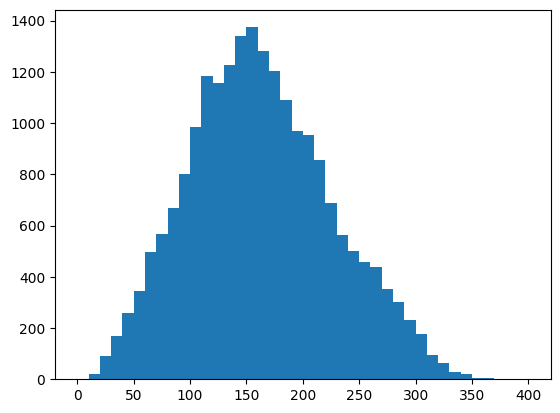

In [ ]:
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.show()

In [ ]:
inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier

In [ ]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [ ]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)

In [ ]:
x = GlobalMaxPool1D()(x)

In [ ]:
x = Dropout(0.1)(x)

In [ ]:
x = Dense(50, activation="relu")(x)

In [ ]:
x = Dropout(0.1)(x)

In [ ]:
x = Dense(6, activation="sigmoid")(x)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 6
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/6


I0000 00:00:1741962641.107785     113 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


525/525 [==============================] - 33s 55ms/step - loss: 0.3590 - accuracy: 0.5882 - val_loss: 0.2523 - val_accuracy: 0.7673
Epoch 2/6
525/525 [==============================] - 12s 22ms/step - loss: 0.2248 - accuracy: 0.7729 - val_loss: 0.2140 - val_accuracy: 0.7423
Epoch 3/6
525/525 [==============================] - 10s 18ms/step - loss: 0.1682 - accuracy: 0.7853 - val_loss: 0.2020 - val_accuracy: 0.7650
Epoch 4/6
525/525 [==============================] - 9s 16ms/step - loss: 0.1335 - accuracy: 0.8046 - val_loss: 0.2131 - val_accuracy: 0.7523
Epoch 5/6
525/525 [==============================] - 8s 15ms/step - loss: 0.1059 - accuracy: 0.8287 - val_loss: 0.2300 - val_accuracy: 0.7528
Epoch 6/6
525/525 [==============================] - 8s 15ms/step - loss: 0.0856 - accuracy: 0.8381 - val_loss: 0.2641 - val_accuracy: 0.7456


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           45360     
                                                                 
 global_max_pooling1d (Glob  (None, 60)                0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 50)                3050      
                                                             

# Second Script

In [ ]:
from keras.layers import GRU, SpatialDropout1D

In [ ]:
inp_gru = Input(shape=(maxlen, )) # maxlen = 200 as defined earlier
embed_size = 128
x_gru = Embedding(max_features, embed_size)(inp_gru)

In [ ]:
x_gru = SpatialDropout1D(0.2)(x_gru)

In [ ]:
x_gru = Bidirectional(GRU(64, return_sequences=True))(x_gru)
x_gru = GlobalMaxPool1D()(x_gru)
x_gru = Dropout(0.2)(x_gru)
x_gru = Dense(64, activation="relu")(x_gru)
x_gru = Dropout(0.2)(x_gru)
x_gru = Dense(6, activation="sigmoid")(x_gru)

In [ ]:
model_gru = Model(inputs=inp_gru, outputs=x_gru)
model_gru.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 6
history_gru = model_gru.fit(X_t, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/6
525/525 [==============================] - 37s 63ms/step - loss: 0.3285 - accuracy: 0.6211 - val_loss: 0.2092 - val_accuracy: 0.7840
Epoch 2/6
525/525 [==============================] - 16s 31ms/step - loss: 0.1926 - accuracy: 0.7639 - val_loss: 0.1920 - val_accuracy: 0.7671
Epoch 3/6
525/525 [==============================] - 14s 27ms/step - loss: 0.1516 - accuracy: 0.7850 - val_loss: 0.2093 - val_accuracy: 0.7490
Epoch 4/6
525/525 [==============================] - 13s 26ms/step - loss: 0.1205 - accuracy: 0.8080 - val_loss: 0.2144 - val_accuracy: 0.7485
Epoch 5/6
525/525 [==============================] - 13s 24ms/step - loss: 0.0979 - accuracy: 0.8238 - val_loss: 0.2420 - val_accuracy: 0.7418
Epoch 6/6
525/525 [==============================] - 12s 23ms/step - loss: 0.0803 - accuracy: 0.8385 - val_loss: 0.2660 - val_accuracy: 0.7473


In [ ]:
model_gru.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 128)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 200, 128)          74496     
 al)                                                             
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                           